# Data Analytics II

    1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv        dataset.
    2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given     dataset

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("/home/student/Documents/31170/A5/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.shape

(400, 5)

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

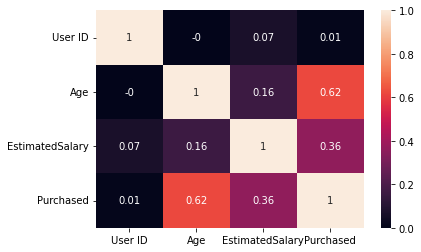

In [8]:
# Checking correlation between all of the fields
# Age and EstimatedSalary are positively correlated with Purchased
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [9]:
# Taking Age and EstimatedSalary as the fields to train (independent variables)
X = df.iloc[:,2:4]

In [10]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
# Taking Purchased as the target (dependent variable)
Y = df.iloc[:,4]

In [12]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
# Spliting data into 75% training data and 25% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [14]:
X_train.shape

(300, 2)

In [15]:
Y_train.shape

(300,)

In [16]:
X_test.shape

(100, 2)

In [17]:
Y_test.shape

(100,)

In [18]:
# Standardization of fields (bringing mean to 0 and standard deviation to 1)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [19]:
# Preparing and training our Logistic Regression Model with the training and testing data
lr = LogisticRegression(random_state = 0, solver = 'lbfgs')
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

In [20]:
# Comparing predicted values with Y_test
print(pred)
print(Y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]
209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64


In [21]:
Y_test

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64

In [22]:
# Creating a confusion matrix to evaluate our Logistic Regression Model
matrix = confusion_matrix(Y_test, pred, labels = lr.classes_)

In [23]:
matrix

array([[61,  2],
       [12, 25]])

In [24]:
tp, fn, fp, tn = confusion_matrix(Y_test, pred, labels = [1, 0]).reshape(-1)

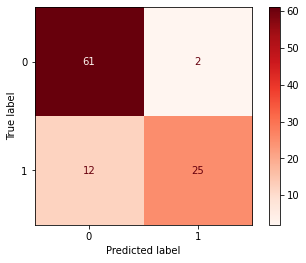

In [25]:
# Displaying the confusion matrix
# tn = 61, fp = 2, tp = 25, fn = 12
c_matrix = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = lr.classes_)
c_matrix.plot(cmap = plt.cm.Reds)

In [26]:
tp

25

In [27]:
tn

61

In [28]:
fn

12

In [29]:
fp

2

In [30]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [32]:
# Displaying the calculations for accuracy, error rate, recall, and precision for the model
print("Accuracy: {:.2f}".format(accuracy_score(Y_test, pred)))
print("Error Rate: " , (fp + fn) / (tp + tn + fn + fp))
print("Recall: " , tp / (tp + fn))
print("Precision: " , tp/(tp+fp))

Accuracy: 0.86
Error Rate:  0.14
Recall:  0.6756756756756757
Precision:  0.9259259259259259
